* **작성자** : 김종원
* 작성일지 : 2021.10.20
---
### 모듈 임포트

In [1]:
import os
import sys
import urllib.request
import json 
import datetime
import re
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### TIOBE INDEX 상위 9개 언어 + R언어
* python
* C
* java
* c++
* c#
* Visual Basic
* JavaScript
* SQL
* PHP
* R

![분석프로세스정리](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbiYEJX%2FbtrihLswNuT%2FA0qtV5EE1ZzwhMepKUk5Zk%2Fimg.png)

---
# 문제 01

과제 설명 첫 두 페이지에 제시한 TIOBE INDEX의 상위 9개 언어에 R(14위)까지해서 총 10개 언어에 대해 출판
책 정보를 수집하세요.

* **방법론**
    * 네이버 API : https://developers.naver.com/docs/search/book/
    *  네이버 책 홈페이지
    
* **주의할점**
    * IT 관련 서적에서 펄 이라는 언어같은 경우는 유명한 작가 펄과 혼돈할 수 있으며
    * Python과 파이썬 처럼 어떤 경우는 영어와 한글을 각각 따로 검색 후 합쳐야 할 수도 있습니다.
    * 만약 여러분들이 네이버 API를 사용하는 경우 일일 검색량 제한에 조심하세요.

## 데이터 수집

In [2]:
# 검색 API에 입력한 단어 정보를 리스트 변수로 저장.
booklist = ["python","C언어","java","c++","c#","Visual Basic","JavaScript","SQL","PHP","R언어","파이썬","자바","자바스크립트"]

In [3]:
# 클라이언트 ID와 secret키 정보 변수에 저장.
client_id = ""
client_secret = ""

In [4]:
def gen_search_url(search_text, start_num, disp_num,sort_str):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + "book" + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    param_sort = "&sort=" + str(sort_str)
    return base + node + param_query + param_start + param_disp+param_sort

def get_result_onpage(url):
    request = urllib.request.Request(url) # 내가 요청하고 싶은 url을 입력한다.
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

1. **데이터 수집(자동화)**

In [5]:
books = []
p = re.compile("\</{0,1}b\>")

for keyword in tqdm_notebook(booklist):
    print("--"*10)
    print(f"책이름 : {keyword}")
    print("--"*10)
    for i in tqdm_notebook(range(1,1001,100)):
        url = gen_search_url(keyword,i,100,"count")
#         print("URI : ",url)
        res = get_result_onpage(url)
        for idx in range(len(res["items"])):
            title = p.sub("",res["items"][idx]["title"]) # 책제목
            isbn = res["items"][idx]["isbn"] # ibsn
            price = res["items"][idx]["price"] # 가격
            author = p.sub("",res["items"][idx]["author"])  # 작가
            publisher = p.sub("",res["items"][idx]["publisher"]) # # 출판사
            discount = res["items"][idx]["discount"] # 할인정보
            link = res["items"][idx]["link"]  # 페이지수
            pubdate = res["items"][idx]["pubdate"] # 출판일
            books.append([keyword,title, price, isbn, author, publisher, discount, pubdate,link])

C:\Users\jongwon\AppData\Local\Temp/ipykernel_23288/3469955873.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for keyword in tqdm_notebook(booklist):


  0%|          | 0/13 [00:00<?, ?it/s]

--------------------
책이름 : python
--------------------


C:\Users\jongwon\AppData\Local\Temp/ipykernel_23288/3469955873.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1,1001,100)):


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:23.684281] Url Request Success
[2021-10-21 03:11:24.101492] Url Request Success
[2021-10-21 03:11:24.532510] Url Request Success
[2021-10-21 03:11:24.995102] Url Request Success
[2021-10-21 03:11:25.442127] Url Request Success
[2021-10-21 03:11:25.891471] Url Request Success
[2021-10-21 03:11:26.338304] Url Request Success
[2021-10-21 03:11:26.785325] Url Request Success
[2021-10-21 03:11:27.227236] Url Request Success
[2021-10-21 03:11:27.675188] Url Request Success
--------------------
책이름 : C언어
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:28.108043] Url Request Success
[2021-10-21 03:11:28.494795] Url Request Success
[2021-10-21 03:11:28.877721] Url Request Success
[2021-10-21 03:11:29.240977] Url Request Success
[2021-10-21 03:11:29.652887] Url Request Success
[2021-10-21 03:11:30.050078] Url Request Success
[2021-10-21 03:11:30.430273] Url Request Success
[2021-10-21 03:11:30.871861] Url Request Success
[2021-10-21 03:11:31.312827] Url Request Success
[2021-10-21 03:11:31.829943] Url Request Success
--------------------
책이름 : java
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:32.287258] Url Request Success
[2021-10-21 03:11:32.696506] Url Request Success
[2021-10-21 03:11:33.117075] Url Request Success
[2021-10-21 03:11:33.536204] Url Request Success
[2021-10-21 03:11:34.011521] Url Request Success
[2021-10-21 03:11:34.450833] Url Request Success
[2021-10-21 03:11:35.119192] Url Request Success
[2021-10-21 03:11:35.647163] Url Request Success
[2021-10-21 03:11:36.080896] Url Request Success
[2021-10-21 03:11:36.485250] Url Request Success
--------------------
책이름 : c++
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:36.885611] Url Request Success
[2021-10-21 03:11:37.286107] Url Request Success
[2021-10-21 03:11:37.644806] Url Request Success
[2021-10-21 03:11:38.019007] Url Request Success
[2021-10-21 03:11:38.383319] Url Request Success
[2021-10-21 03:11:38.765543] Url Request Success
[2021-10-21 03:11:39.177483] Url Request Success
[2021-10-21 03:11:39.534462] Url Request Success
[2021-10-21 03:11:39.969713] Url Request Success
[2021-10-21 03:11:40.387850] Url Request Success
--------------------
책이름 : c#
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:40.805133] Url Request Success
[2021-10-21 03:11:41.178034] Url Request Success
[2021-10-21 03:11:41.565309] Url Request Success
[2021-10-21 03:11:41.938572] Url Request Success
[2021-10-21 03:11:42.393441] Url Request Success
[2021-10-21 03:11:42.794414] Url Request Success
[2021-10-21 03:11:43.193966] Url Request Success
[2021-10-21 03:11:43.576790] Url Request Success
[2021-10-21 03:11:43.894513] Url Request Success
[2021-10-21 03:11:44.229089] Url Request Success
--------------------
책이름 : Visual Basic
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:44.644288] Url Request Success
[2021-10-21 03:11:45.037072] Url Request Success
[2021-10-21 03:11:45.469899] Url Request Success
[2021-10-21 03:11:45.908768] Url Request Success
[2021-10-21 03:11:46.350419] Url Request Success
[2021-10-21 03:11:46.773059] Url Request Success
[2021-10-21 03:11:47.135677] Url Request Success
[2021-10-21 03:11:47.487967] Url Request Success
[2021-10-21 03:11:47.816671] Url Request Success
[2021-10-21 03:11:48.114211] Url Request Success
--------------------
책이름 : JavaScript
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:48.580828] Url Request Success
[2021-10-21 03:11:49.024806] Url Request Success
[2021-10-21 03:11:49.566892] Url Request Success
[2021-10-21 03:11:50.076132] Url Request Success
[2021-10-21 03:11:50.506773] Url Request Success
[2021-10-21 03:11:50.885458] Url Request Success
[2021-10-21 03:11:51.236225] Url Request Success
[2021-10-21 03:11:51.555346] Url Request Success
[2021-10-21 03:11:51.878650] Url Request Success
[2021-10-21 03:11:52.202182] Url Request Success
--------------------
책이름 : SQL
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:52.717337] Url Request Success
[2021-10-21 03:11:53.111042] Url Request Success
[2021-10-21 03:11:53.508545] Url Request Success
[2021-10-21 03:11:53.915243] Url Request Success
[2021-10-21 03:11:54.360194] Url Request Success
[2021-10-21 03:11:54.767308] Url Request Success
[2021-10-21 03:11:55.226361] Url Request Success
[2021-10-21 03:11:55.699541] Url Request Success
[2021-10-21 03:11:56.149075] Url Request Success
[2021-10-21 03:11:56.665597] Url Request Success
--------------------
책이름 : PHP
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:11:57.060333] Url Request Success
[2021-10-21 03:11:57.423302] Url Request Success
[2021-10-21 03:11:57.814504] Url Request Success
[2021-10-21 03:11:58.258085] Url Request Success
[2021-10-21 03:11:58.656684] Url Request Success
[2021-10-21 03:11:59.014398] Url Request Success
[2021-10-21 03:11:59.367198] Url Request Success
[2021-10-21 03:11:59.694327] Url Request Success
[2021-10-21 03:11:59.998371] Url Request Success
[2021-10-21 03:12:00.292857] Url Request Success
--------------------
책이름 : R언어
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:12:00.748424] Url Request Success
[2021-10-21 03:12:01.198155] Url Request Success
[2021-10-21 03:12:01.671215] Url Request Success
[2021-10-21 03:12:02.183012] Url Request Success
[2021-10-21 03:12:02.620222] Url Request Success
[2021-10-21 03:12:02.994379] Url Request Success
[2021-10-21 03:12:03.426291] Url Request Success
[2021-10-21 03:12:03.768397] Url Request Success
[2021-10-21 03:12:04.136705] Url Request Success
[2021-10-21 03:12:04.801962] Url Request Success
--------------------
책이름 : 파이썬
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:12:05.213115] Url Request Success
[2021-10-21 03:12:05.606870] Url Request Success
[2021-10-21 03:12:05.984324] Url Request Success
[2021-10-21 03:12:06.356242] Url Request Success
[2021-10-21 03:12:06.699710] Url Request Success
[2021-10-21 03:12:07.081494] Url Request Success
[2021-10-21 03:12:07.465210] Url Request Success
[2021-10-21 03:12:07.898068] Url Request Success
[2021-10-21 03:12:08.352325] Url Request Success
[2021-10-21 03:12:08.818896] Url Request Success
--------------------
책이름 : 자바
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:12:09.233525] Url Request Success
[2021-10-21 03:12:09.605388] Url Request Success
[2021-10-21 03:12:09.995488] Url Request Success
[2021-10-21 03:12:10.356225] Url Request Success
[2021-10-21 03:12:10.727976] Url Request Success
[2021-10-21 03:12:11.084947] Url Request Success
[2021-10-21 03:12:11.416872] Url Request Success
[2021-10-21 03:12:11.839886] Url Request Success
[2021-10-21 03:12:12.189894] Url Request Success
[2021-10-21 03:12:12.530777] Url Request Success
--------------------
책이름 : 자바스크립트
--------------------


  0%|          | 0/10 [00:00<?, ?it/s]

[2021-10-21 03:12:12.952480] Url Request Success
[2021-10-21 03:12:13.303384] Url Request Success
[2021-10-21 03:12:13.724984] Url Request Success
[2021-10-21 03:12:14.144359] Url Request Success
[2021-10-21 03:12:14.612893] Url Request Success
[2021-10-21 03:12:15.051918] Url Request Success
[2021-10-21 03:12:15.479580] Url Request Success
[2021-10-21 03:12:15.923170] Url Request Success
[2021-10-21 03:12:16.362147] Url Request Success
[2021-10-21 03:12:16.797808] Url Request Success


수집된 데이터 정보 DataFrame 형태로 변환

In [6]:
book_df = pd.DataFrame(books,columns=["프로그램언어","책제목","가격","isbn","작가","출판사","할인된기격","출판일","링크"])
print("dataFrame shape",book_df.shape)
book_df.head(2)

dataFrame shape (13000, 9)


,프로그램언어,책제목,가격,isbn,작가,출판사,할인된기격,출판일,링크
0,python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,32000,1165213192 9791165213190,브렛 슬라킨 지음|오현석,길벗,28800,20201030,http://book.naver.com/bookdb/book_detail.php?b...
1,python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),25000,8956748578 9788956748573,이경택|방성수|안상준,정보문화사,22500,20201008,http://book.naver.com/bookdb/book_detail.php?b...


수집된 정보 csv 파일로 저장.

In [7]:
# book_df.to_csv("./book_info.csv",encoding="utf-8-sig",index=False)

In [8]:
df = pd.read_csv("./book_info.csv")
df.shape

(13000, 9)

## 데이터 정제
   1. 한국 출판사 기준으로 정제
   2. 분석 대상 선정 -> Top 50 출판사
   3. 동일한 책 이름들 정제
   4. 동일한 ISBN을 가지는 데이터 정제

In [9]:
print("현재 출판사 종류 수 :",len(df["출판사"].unique()))

현재 출판사 종류 수 : 1498


1. 한국 출판사 기준으로 정제

    출판사 명이 영어인 출판사들은 외국 출판사가 대부분이기에, 한글이 입력된 출판사를 추출해 한국 출판사인 데이터로 정제한다.

In [10]:
publishDF = pd.DataFrame(df["출판사"].value_counts().sort_values(ascending=False)).reset_index()
publish1 = publishDF[publishDF["index"].str.contains(r"[가-하고-호기-히]")]
print("한국 출판사 종류 수 :",len(publish1["index"].unique()))
publish1.head(5)

한국 출판사 종류 수 : 643


,index,출판사
0,에이콘출판,527
1,한빛미디어,495
5,정보문화사,282
6,영진닷컴,274
7,위키북스,215


C:\Users\jongwon\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


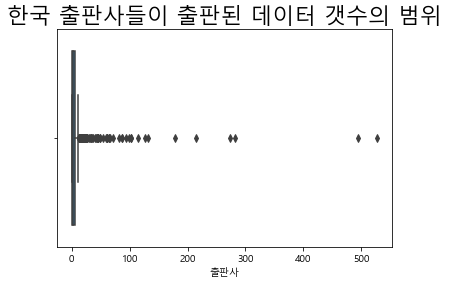

In [11]:
sns.boxplot(publish1["출판사"]);
plt.title("한국 출판사들이 출판된 데이터 갯수의 범위",fontsize=22)
plt.show();

In [12]:
publish1["출판사"].value_counts()[:10]

1     277
2     114
3      52
4      30
5      21
9      15
6      12
7      11
8       8
10      8
Name: 출판사, dtype: int64

In [13]:
publish1["출판사"].describe()

count    643.000000
mean      10.076205
std       37.091141
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      527.000000
Name: 출판사, dtype: float64

2. Top 50이라는 분석 대상 설정.
    
    643개의 출판사 중에서 75%이상이 5개의 데이터만 가지고 있다. 그래서 해당 데이터를 출판사 데이터 갯수로 Top 50을 추출해 한국에서 출판을 많이한 Top 50 출판사 기준으로 분석을 진행한다.

In [14]:
publish1 = publish1.head(50).reset_index(drop=True)

In [15]:
publish1

,index,출판사
0,에이콘출판,527
1,한빛미디어,495
2,정보문화사,282
3,영진닷컴,274
4,위키북스,215
5,길벗,179
6,인사이트,132
7,성안당,127
8,제이펍,114
9,대림,102


In [16]:
publish1.columns = ["출판사","count"]

In [17]:
df = df.merge(publish1,on="출판사").reset_index(drop=True)
print("변환후 shape : ",df.shape)
df.head()

변환후 shape :  (4419, 10)


,프로그램언어,책제목,가격,isbn,작가,출판사,할인된기격,출판일,링크,count
0,python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,32000.0,1165213192 9791165213190,브렛 슬라킨 지음|오현석,길벗,28800.0,20201030,http://book.naver.com/bookdb/book_detail.php?b...,179
1,C언어,모두의 C언어 (스스로 생각하면서 배우는 C프로그래밍 기초),18000.0,1160508550 9791160508550,이형우,길벗,16200.0,20190802,http://book.naver.com/bookdb/book_detail.php?b...,179
2,C언어,C언어 코딩 도장,25000.0,1187345288 9791187345282,남재윤,길벗,22500.0,20160630,http://book.naver.com/bookdb/book_detail.php?b...,179
3,C언어,"COS Pro 2급 C 언어 (프로그래머를 향한 출발점,교재+모의고사)",20000.0,1160504113 9791160504118,남재윤,길벗,18000.0,20180215,http://book.naver.com/bookdb/book_detail.php?b...,179
4,C언어,"시나공 정보처리기사 실기 (C와 JAVA의 기,산업기사 포함,2019)",31000.0,1160506973 9791160506976,한기준|김기윤|김정준|강윤석|길벗알앤디,길벗,NaN,20190121,http://book.naver.com/bookdb/book_detail.php?b...,179


3. 동일한 책 이름일 경우 정제
    
    Naver 검색 API를 통해 책 이름 정보를 검색했는데 이때 검색 단어가 다른데 같은 책이름이 존재한다. 그렇기에 해당 책이름들은 하드 코딩을 통해 올바른 데이터로 정제한다.
    
< 하드 코딩을 하는 이유 >
- 공통 집합끼리의 공통된 패턴이 크게 없고 세분화되게 존재해서 하드 코딩을 통해서 데이터를 정제한다.

In [18]:
print("유니크한 책 제목 수 : ",len(df["책제목"].unique()), "1차 정제된 데이터 프레임의 수 열수 : ",df.shape[0])

유니크한 책 제목 수 :  3605 1차 정제된 데이터 프레임의 수 열수 :  4419


약 1000개 정도가 같은 제목의 데이터인것을 알수 있다.

In [19]:
AA= df[["책제목","프로그램언어"]].groupby("책제목").count().reset_index()
AA.columns = ["책제목","중복 갯수"]

In [20]:
df = df.merge(AA,on="책제목")

In [21]:
# 중복된 데이터 추출
df1 = df[df["중복 갯수"]!=1]

df2 = df1[["책제목","프로그램언어","중복 갯수"]].groupby(["책제목","프로그램언어"]).agg("count").reset_index()
df2.head(2)

,책제목,프로그램언어,중복 갯수
0,ADD-ON HTML+JAVA SCRIPT,JavaScript,1
1,ADD-ON HTML+JAVA SCRIPT,java,1


In [22]:
def cotainsTitle(x,y):
    """
        x : 책제목
        y : 네이버 API때 검색어로 사용한 프로그램언어
        --------------------------------------------
        자바 같은 경유에는 자바 스크립트가 같이 검색될 확률이 높다 그래서 자바 검색 안에 자바스크립트가 포함되어 있는지 로직을 추가하여 검사를 진행한다.
        C언어 경우도 C# C++이 있기에 해당 단어도 검색이 되면 C # 인지 구별하기로 한다.
    """
    y = y.upper() 
    x = x.upper()
    flag = False
    searchingList_Py = ["PYTHON","파이썬"]
    searchingList_C = ["C언어","C 언어","C"]
    searchingList_J = ["JAVA","자바"]
    searchingList_JS = ["JAVASCRIPT","JAVA SCRIPT","SCRIPT","자바스크립트","JS","JAVA SERVER PAGES","JAVA SERVLETS","자바 스크립트"]
    searchingList_C1 = ["C++"]
    searchingList_C2 = ["C#"]
    searchingList_Vi = ["Visual Basic","Visual","Basic","VISUAL BASIC"]
    searchingList_SQ = ["SQL"]
    searchingList_PH = ["PHP"]
    searchingList_R = ["R언어","R"]
    
    def iterrors(x, searchingList, keyworld, flag):
        for word in searchingList:
            if word.upper() in x:
                flag= keyworld
                break
        return flag
    
    if y =="PYTHON" or y=="파이썬":
        flag = iterrors(x, searchingList_Py, "파이썬",flag)
                
    elif y =="C언어":
        flag = iterrors(x, searchingList_C, "C언어",flag)
        flag = iterrors(x, searchingList_C1, "c++",flag)
        flag = iterrors(x, searchingList_C2, "c#", flag)
        flag = iterrors(x, searchingList_Py, "파이썬",flag)
        
    elif y =="JAVA" or y=="자바":
        flag = iterrors(x, searchingList_J, "자바", flag) 
        flag = iterrors(x, searchingList_JS, "자바스크립트", flag) 
        
    elif y =="C++":
        flag = iterrors(x, searchingList_C1, "c++",flag)
    elif y =="C#":
        flag = iterrors(x, searchingList_C2, "c#", flag)  
    elif y =="Visual Basic" or y == "VISUAL BASIC":
        flag = iterrors(x, searchingList_Vi, "Visual Basic", flag)  
    
    elif y =="JAVASCRIPT" or y =="자바스크립트":
        flag = iterrors(x, searchingList_JS, "자바스크립트", flag) 
    
    elif y =="SQL":
        flag = iterrors(x, searchingList_SQ, "SQL", flag) 
        
    elif y =="PHP":
        flag = iterrors(x, searchingList_PH, "PHP", flag) 
                
    elif y =="R언어":
        flag = iterrors(x, searchingList_R, "R언어", flag)        
    else:
        print(f"아무것도 아닌것 :{y} // {x}")

    if flag == False:
        print(f"아무것도 아닌것들 Flag : {y} // {x}")
    return flag

In [23]:
df2["포함여부"] = False
for idx ,rows in df2.iterrows():
    bools = cotainsTitle(rows["책제목"], rows["프로그램언어"])
    df2.loc[idx,"포함여부"] = bools

아무것도 아닌것들 Flag : 자바스크립트 // AI 시대, 우리 아이 교육은? (문과 엄마가 들려주는 미래 시대 자녀 교육법)
아무것도 아닌것들 Flag : 파이썬 // AI 시대, 우리 아이 교육은? (문과 엄마가 들려주는 미래 시대 자녀 교육법)
아무것도 아닌것들 Flag : R언어 // ANSI SQL
아무것도 아닌것들 Flag : R언어 // C 언어 (요리조리 맛있는)
아무것도 아닌것들 Flag : 자바스크립트 // C# 7 AND .NET CORE 2.X BLUEPRINTS (프로젝트별 예제로 배우는 C#과 닷넷 코어)
아무것도 아닌것들 Flag : 파이썬 // COS PRO 2급 C 언어 (프로그래머를 향한 출발점,교재+모의고사)
아무것도 아닌것들 Flag : 자바 // CLEAN CODE (클린 코드,애자일 소프트웨어 장인 정신)
아무것도 아닌것들 Flag : 자바 // DO IT! HTML5+CSS3 웹 표준의 정석
아무것도 아닌것들 Flag : 자바스크립트 // DO IT! HTML5+CSS3 웹 표준의 정석
아무것도 아닌것들 Flag : 자바스크립트 // DO IT! 장고+부트스트랩 파이썬 웹 개발의 정석 (웹 기초부터 블로그 개발 배포 운영까지, 만들면서 배우는 웹 개발 A TO Z)
아무것도 아닌것들 Flag : 자바 // DO IT! 첫 코딩 WITH 파이썬 (보통 사람이 알아야 할 프로그래밍 기초)
아무것도 아닌것들 Flag : 자바스크립트 // GWT 구글 웹 툴킷 (자바로 하는 AJAX 프로그래밍)
아무것도 아닌것들 Flag : 자바 // HTML5 웹 프로그래밍 입문
아무것도 아닌것들 Flag : 자바스크립트 // HTML5 웹 프로그래밍 입문
아무것도 아닌것들 Flag : 자바스크립트 // HTML5 웹소켓 프로그래밍 (안전하고 확장 가능한 실시간 웹 애플리케이션 개발)
아무것도 아닌것들 Flag : 파이썬 // HTML5 웹소켓 프로그래밍 (안전하고 확장 가능한 실시간 웹 애플리케이션 개발)
아무것도 아닌것들 Flag : 

아무것도 아닌것들 Flag : C언어 // 케라스 창시자에게 배우는 딥러닝 (창시자의 철학까지 담았다!)
아무것도 아닌것들 Flag : 파이썬 // 케라스 창시자에게 배우는 딥러닝 (창시자의 철학까지 담았다!)
아무것도 아닌것들 Flag : 파이썬 // 코딩 교육을 위한 마이크로비트 (자바스크립트 블록 편집기 버전)
아무것도 아닌것들 Flag : C언어 // 코딩 인터뷰 완전 분석 (189가지 프로그래밍 문제와 해법,프로그래밍인사이트)
아무것도 아닌것들 Flag : 자바 // 코딩 인터뷰 완전 분석 (189가지 프로그래밍 문제와 해법,프로그래밍인사이트)
아무것도 아닌것들 Flag : 자바스크립트 // 클린 코드를 위한 테스트 주도 개발 (파이썬을 이용한)
아무것도 아닌것들 Flag : 파이썬 // 타입스크립트 프로그래밍 (더 빠르고 안정적인 자바스크립트 앱 개발을 위한 핵심 기능과 활용법)
아무것도 아닌것들 Flag : 자바스크립트 // 파이썬 마이크로서비스 (모범 사례로 알아보는 파이썬 마이크로서비스 개발, 테스트,배포, 확장까지)
아무것도 아닌것들 Flag : R언어 // 파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법까지 배우는)
아무것도 아닌것들 Flag : 자바스크립트 // 파이썬 웹 스크래핑 (다양한 상황 해결을 통한 웹 스크랩)
아무것도 아닌것들 Flag : 자바스크립트 // 파이썬 웹 스크래핑 (수많은 데이터 사이에서 필요한 정보 수집하기)
아무것도 아닌것들 Flag : 자바스크립트 // 파이썬 웹 프로그래밍 (플라스크를 이용한 쉽고 빠른 웹 개발)
아무것도 아닌것들 Flag : R언어 // 파이썬 프로그래밍 (누구나 쉽게 배우는)
아무것도 아닌것들 Flag : 자바스크립트 // 파이썬 플레이그라운드 (호기심 많은 프로그래머를 위한 14가지 창의적 프로젝트)
아무것도 아닌것들 Flag : 자바스크립트 // 파이썬과 JUPYTER NOTEBOOK (IPYTHON을 활용한 데이터 분석과 시각화)
아무것도 아닌것들 

In [24]:
for idx ,rows in df2.loc[df2["포함여부"] !=False].iterrows():
    df2.loc[idx,"프로그램언어"] =rows["포함여부"]

In [25]:
df2 = df2[df2["포함여부"] != False].drop(["중복 갯수","포함여부"],axis=1).drop_duplicates().reset_index(drop=True)

In [26]:
df2.columns = ["책제목","뉴프로그램언어"]

In [27]:
df2.shape

(673, 2)

In [28]:
df2["책제목"].nunique()

623

df2에 아직 중복된 제목이 존재한다 그래서 한번더 정제과정을 진행한다.

In [29]:
dfM = df2.groupby("책제목").count()

dfM[dfM["뉴프로그램언어"] >1].tail()

,뉴프로그램언어
책제목,
"시나공 정보처리기사 실기 (C와 JAVA의 기,산업기사 포함,2019)",2
알기 쉬운 파이썬 SQL 코딩하기(나도 코딩한다),2
"이것이 MySQL이다 (MySQL 설치부터 PHP, 파이썬 연동까지 한번에!)",2
"이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드, C/C++, 자바 코드 제공)",3
"초보자를 위한 PHP, MySQL, Apache",3


원본데이터에서 해당 책 제목으로 isbn이 같은지 확인한다.

In [30]:
df[df["책제목"]=="이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드, C/C++, 자바 코드 제공)"]["isbn"]

1873    1162243074 9791162243077
1874    1162243074 9791162243077
1875    1162243074 9791162243077
1876    1162243074 9791162243077
Name: isbn, dtype: object

책 이름에 두가지 이상의 언어가 수록된 책들이 포함되어 있다 이 책들은 같은 isbn	값을 가지고 이 책을 어떤 언어책이다 라고 통합하여 말할 수 없기에 해당 책들은 삭제하고 진행한다.

In [31]:
df2 = df2.set_index("책제목").loc[dfM[dfM["뉴프로그램언어"] ==1].index].reset_index()
df2.shape

(579, 2)

In [32]:
print(df2["책제목"].nunique(), df2.shape[0])

579 579


중복된 책 제목에 대해서 정제가 완료됐다면, 데이터를 병합한다.

In [33]:
df = df.merge(df2,on="책제목",how="outer")

데이터 검증

In [34]:
set(df[df["뉴프로그램언어"].notnull()]["책제목"].values) - set(df2["책제목"].values)

set()

In [35]:
set(df2["책제목"].values) - set(df[df["뉴프로그램언어"].notnull()]["책제목"].values)

set()

In [36]:
len(set(df2["책제목"].values) & set(df[df["뉴프로그램언어"].notnull()]["책제목"].values))

579

In [37]:
temp = df[df["뉴프로그램언어"].notnull()].drop(["프로그램언어","count"],axis=1).drop_duplicates()
temp.shape

(725, 10)

이름이 유닉크한 값이 579개가 발생해야하느데 df에서 정재 후 나온 temp의 shape은 725개이다. 그러면 이름을 제외하고 가격이나 할인된 가격 등 정보가 다른것이 있기에 약 150개가 중복된 데이터가 존재하는 것을 알수 있다.

그래서 해당 데이터들에 대해서 조사를 진행한다.

* 중복된 책들에 대해 출판사에 대해 조사

In [38]:
temp1 = temp[["책제목","출판사"]].drop_duplicates()

In [39]:
temp1["뉴"]= 1

temp1["뉴"] = temp1.groupby(["책제목","출판사"]).cumsum()

temp1[temp1["뉴"] != 1]

temp["책제목"].nunique()

ax = temp1.groupby("책제목").count()
ax[ax["뉴"] !=1].head(2)

temp1[temp1["책제목"] =="C 언어 프로그래밍"]

,책제목,출판사,뉴
3159,C 언어 프로그래밍,기한재,1
3160,C 언어 프로그래밍,정일,1


같은 책 제목이지만 출판사가 다르다는 특징이 존재했다.

* 책들의 가격 조사

In [40]:
# 해당 책들이 가격이 다르다. 
t = temp[["책제목","출판사","뉴프로그램언어"]].groupby(["책제목","출판사"]).agg("count")
t[t["뉴프로그램언어"] !=1]

,,뉴프로그램언어
책제목,출판사,
"Building Machine Learning Systems with Python (한국어판,Scikit-learn 라이브러리로 구현하는 기계 학습 시스템)",에이콘출판,2
C# 30일 완성,영진닷컴,2
C# 프로그래밍,한빛미디어,2
C#으로 만들어 보는 시스템 트레이딩 for 키움증권,퍼플,2
C++ 기초 플러스,성안당,3
...,...,...
프로그래머를 위한 JAVA 2,홍릉과학출판사,2
한권으로 마스터하는 자바프로그래밍,퍼플,2
한권으로 마스터하는 자바프로그래밍 - 2013 개정판,퍼플,2


In [41]:
temp[temp["책제목"] =="C# 30일 완성"]

,책제목,가격,isbn,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어
782,C# 30일 완성,23000.0,8931419872 9788931419870,손호성,영진닷컴,NaN,20020105,http://book.naver.com/bookdb/book_detail.php?b...,2,c#
783,C# 30일 완성,26000.0,893142146X 9788931421460,손호성,영진닷컴,NaN,20020701,http://book.naver.com/bookdb/book_detail.php?b...,2,c#


같은 출판사이지만 책의 가격이 다르며 isbn도 다른것을 알수 있었다. 그렇기에 해당 책들은 다른 책이며, 또 isbn이 다른 이유로는 인쇄책과 전자책일 경우 서로 다른 isbn을 갖기 때문에 해당 책은 다른 책으로 볼수 있다.

In [42]:
temp

,책제목,가격,isbn,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,32000.0,1165213192 9791165213190,브렛 슬라킨 지음|오현석,길벗,28800.0,20201030,http://book.naver.com/bookdb/book_detail.php?b...,3,파이썬
5,"COS Pro 2급 C 언어 (프로그래머를 향한 출발점,교재+모의고사)",20000.0,1160504113 9791160504118,남재윤,길벗,18000.0,20180215,http://book.naver.com/bookdb/book_detail.php?b...,2,C언어
14,코딩 테스트를 위한 자료 구조와 알고리즘 with C++ (67개 문제 풀이로 익히자!),32000.0,1165213796 9791165213794,존 캐리|셰리안 도시|파야스 라잔,길벗,28800.0,20201208,http://book.naver.com/bookdb/book_detail.php?b...,2,c++
16,모두의 알고리즘 with 파이썬 (컴퓨팅 사고를 위한 기초 알고리즘),16000.0,1160501726 9791160501728,이승찬,길벗,14400.0,20170518,http://book.naver.com/bookdb/book_detail.php?b...,2,파이썬
20,리팩토링 자바스크립트 (지저분한 자바 스크립트 코드에서 벗어나자!),36000.0,1160505896 9791160505894,에반 버차드,길벗,32400.0,20181012,http://book.naver.com/bookdb/book_detail.php?b...,4,자바스크립트
...,...,...,...,...,...,...,...,...,...,...
4363,자바스크립트 쉽고 빠르게,17000.0,8981930848 9788981930844,송기열,피씨북,NaN,20020720,http://book.naver.com/bookdb/book_detail.php?b...,2,자바스크립트
4378,거침없이 배우는 자바스크립트 & 제이쿼리,35000.0,899382794X 9788993827941,데이비드 소이어 맥파랜드,지앤선,31500.0,20150430,http://book.naver.com/bookdb/book_detail.php?b...,2,자바스크립트
4380,거침없이 배우는 자바스크립트,35000.0,8993827249 9788993827248,데이비드 소이어 맥파랜드,지앤선,NaN,20101004,http://book.naver.com/bookdb/book_detail.php?b...,2,자바스크립트
4382,거침없이 배우는 커피 스크립트 (더 빠른 자바스크립트 개발을 위한),18000.0,8993827583 9788993827583,트레버 번햄,지앤선,16200.0,20131209,http://book.naver.com/bookdb/book_detail.php?b...,2,자바스크립트


책제목 정보가 오직 한개인 데이터에 대해서 뉴프로그램언어 컬럼에 이전 프로그램언어 정보를 기입한다.

In [43]:
normalTemp = df[df["뉴프로그램언어"].isnull()]
for idx, rows in normalTemp.iterrows():
    normalTemp.loc[idx,"뉴프로그램언어"] = rows["프로그램언어"]
normalTemp.drop(["프로그램언어","count"],axis=1,inplace=True)
normalTemp["뉴프로그램언어"].isnull().sum()

C:\Users\jongwon\miniconda3\envs\ds_study\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\jongwon\miniconda3\envs\ds_study\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0

In [44]:
clean_df = pd.concat([temp,normalTemp],axis=0).reset_index(drop=True)
print("공통된 isbn 찾기전까지 정제된 data shape : ",clean_df.shape)
clean_df.head(3)

공통된 isbn 찾기전까지 정제된 data shape :  (3853, 10)


,책제목,가격,isbn,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,32000.0,1165213192 9791165213190,브렛 슬라킨 지음|오현석,길벗,28800.0,20201030,http://book.naver.com/bookdb/book_detail.php?b...,3,파이썬
1,"COS Pro 2급 C 언어 (프로그래머를 향한 출발점,교재+모의고사)",20000.0,1160504113 9791160504118,남재윤,길벗,18000.0,20180215,http://book.naver.com/bookdb/book_detail.php?b...,2,C언어
2,코딩 테스트를 위한 자료 구조와 알고리즘 with C++ (67개 문제 풀이로 익히자!),32000.0,1165213796 9791165213794,존 캐리|셰리안 도시|파야스 라잔,길벗,28800.0,20201208,http://book.naver.com/bookdb/book_detail.php?b...,2,c++


내가 필요한 정보가 무엇인지 다시 확인한다. 
* 책 제목, isbn, 출판사,출판일,가격, 페이지수(링크를 통해 page 수 받아오기)

---
# 문제 02

전세계에서 간행되는 도서에 고유번호를 인가하여 문헌정보와 유통의 효율화를 기대하기 위해 부여되는 일종의
책의 ID 역할을 하는 ISBN 넘버가 있습니다. 문제1에서 수집한 데이터를 ISBN 정보로 unique 검사 후 중복
데이터를 정리하세요.

In [45]:
print("2차 정제된 DataFrame에서 isbn의 유닉크 값 갯수 조회 : ",len(clean_df["isbn"].unique()))
print("2차 정제된 DataFrame의 shape 수 : ",clean_df.shape[0])

2차 정제된 DataFrame에서 isbn의 유닉크 값 갯수 조회 :  3743
2차 정제된 DataFrame의 shape 수 :  3853


정제된 DataFrame 수에서 약 90개 정도 isbn이 중복되는 것을 알수 있다. 중복된 isbn 값을 제거한다.

4. 동일한 isbn 정제

  * 중복된 isbn 정보 찾기

In [46]:
m = clean_df[["책제목","isbn","출판사","뉴프로그램언어"]].groupby(["isbn","책제목","출판사","뉴프로그램언어"]).count().reset_index()
m.head(3)

,isbn,책제목,출판사,뉴프로그램언어
0,0000215597 1400000215593,HTML JavaScript CSS,퍼플,자바스크립트
1,000022443X 1400000224434,한권으로 마스터하는 자바프로그래밍 - 2013 개정판,퍼플,자바
2,0000264229 1400000264225,SQL서버 연동 엑셀데이터베이스 활용 기본편,퍼플,SQL


In [47]:
# 누적 값을 저장하기 위해 new 라는 컬럼 생성.
m["new"]=1
m["new"] = m.groupby(["isbn","책제목","출판사"]).cumsum()["new"]

In [48]:
# 동일한 isbn에 다른 프로그램어가 존자하며 해당 책제목의 특징은 해당 프로그램어를 모두 품을수 있다는 특징이 있다.
m1 = m.set_index("책제목").loc[m[m["new"]!=1]["책제목"].values][["isbn","출판사","뉴프로그램언어"]]
m1

,isbn,출판사,뉴프로그램언어
책제목,,,
Web Database Applications with PHP & MySQL,0596000413 9780596000417,OReilly(오라일리),PHP
Web Database Applications with PHP & MySQL,0596000413 9780596000417,OReilly(오라일리),SQL
HTML5 웹 프로그래밍 입문,1156644550 9791156644552,한빛아카데미,자바
HTML5 웹 프로그래밍 입문,1156644550 9791156644552,한빛아카데미,자바스크립트
익스플로링 라즈베리 파이 (임베디드 리눅스와 전자회로를 이용한 라즈베리 파이 완벽 활용 가이드),1158390971 9791158390976,위키북스,자바스크립트
...,...,...,...
PHP6 MYSQL5 (다이내믹한 웹사이트 만들기),8992939469 9788992939461,위키북스,자바스크립트
PHP MySQL 프로그래밍,8994914927 9788994914923,북스홀릭,PHP
PHP MySQL 프로그래밍,8994914927 9788994914923,북스홀릭,SQL


해당 데이터를 보면isbn이 같다. 그런데 이전에 naver API를 통해 해당 프로그램어를 검색해서 관련된 책 정보 데이터를 받아왔다. 거기서 공통된 데이터가 존재했고, 확인된 책 제목으로 관련된 프로그램어가 두개 이상 공통된 결과로 보여진다. 그래서 해당 데이터가 어디에 속한다 라고 정의하기 어렵고 또한 isbn이 공통되었기 때문에 한 개 데이터만 남기기가 어렵다 그래서 **위 데이터를 삭제하고 진행을 한다.**

In [49]:
remove_isbn = m1.reset_index()['isbn'].unique()

In [50]:
clean_isbn = set(clean_df["isbn"].values) - set(remove_isbn)

In [51]:
clean_df = clean_df.set_index("isbn").loc[clean_isbn].reset_index()

In [52]:
clean_df["isbn"].nunique() , clean_df.shape[0]

(3673, 3686)

아직 isbn과 데이터 프레임의 수가 다른것으로 보여진다. 그렇기에 한번더 데이터를 정제를 한다.

In [53]:
clean_df.columns

Index(['isbn', '책제목', '가격', '작가', '출판사', '할인된기격', '출판일', '링크', '중복 갯수',
       '뉴프로그램언어'],
      dtype='object')

In [54]:
clean_df["할인된기격"].fillna(0,inplace=True)

In [55]:
m = clean_df[["책제목","isbn","할인된기격"]].groupby(["책제목","isbn"]).count()
m

,,할인된기격
책제목,isbn,
.NET ENTERPRISE DEVELOPMENT IN C# (설계에서 배치까지),8956740380 9788956740386,1
1%의 프로그래밍 작동 원리 (성공과 실패를 결정하는),8931555970 9788931555974,1
1001가지 자바 프로그래머 팀,8931545177 9788931545173,1
10G로 시작하는 오라클 SQL PL SQL,8989345898 9788989345893,1
10대를 위한 파이썬 교과서 (컴퓨팅 사고력과 알고리즘 배우기),890954211X 9788909542111,1
...,...,...
홈페이지를 위한 HTML CSS 자바스크립트 초보 탈출 이야기,8981930899 9788981930899,1
화이트 해커를 위한 암호와 해킹,8956748381 9788956748382,1
화이트 해커를 위한 암호와 해킹 (White Hat Python),8956746974 9788956746975,1


In [56]:
m[m["할인된기격"]!=1]

,,할인된기격
책제목,isbn,
모바일 자바 PDA 핸드폰 프로그래밍,8981930856 9788981930851,2
자바 서버 페이지,8979141335 9788979141337,2


In [57]:
m = clean_df[["책제목","isbn"]].groupby(["isbn"]).count()
m

,책제목
isbn,
0000215597 1400000215593,1
000022443X 1400000224434,1
0000264229 1400000264225,1
0000264237 1400000264232,1
0000268046 1400000268049,1
...,...
8998756684 9788998756680,1
899875679X 9788998756796,1
8998756951 9788998756956,1


In [58]:
clean_df.set_index("isbn").loc[m[m["책제목"] !=1].index].head(10)

,책제목,가격,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어
isbn,,,,,,,,,
8931531729 9788931531725,C언어를 이용한 80C196KC와 MicroMouse (Windows XP에서 Ta...,28000.0,송봉길,성안당,25200.0,20050406,http://book.naver.com/bookdb/book_detail.php?b...,1,C언어
8931531729 9788931531725,C 언어를 이용한 80C196KC와 MicroMouse,28000.0,송봉길|이태현|오희재,성안당,0.0,20050406,http://book.naver.com/bookdb/book_detail.php?b...,1,C언어
8935302732 9788935302734,자바스크립트,16000.0,이종득,정익사,0.0,20000126,http://book.naver.com/bookdb/book_detail.php?b...,8,자바스크립트
8935302732 9788935302734,자바 스크립트,16000.0,이종득,정익사,16000.0,20000115,http://book.naver.com/bookdb/book_detail.php?b...,2,자바스크립트
8940690214 9788940690215,PHP4 CLASS 실무완성 V1.0,17000.0,김현철,크라운출판사,0.0,20010710,http://book.naver.com/bookdb/book_detail.php?b...,1,PHP
8940690214 9788940690215,PHP 4 CLASS실무완성V1.0,17000.0,김현철,크라운출판사,0.0,20010615,http://book.naver.com/bookdb/book_detail.php?b...,1,PHP
8972806048 9788972806042,엔터프라이즈 자바빈즈 (C0NTACT),23000.0,김창호,대림,0.0,20010705,http://book.naver.com/bookdb/book_detail.php?b...,1,자바
8972806048 9788972806042,CONTACT ENTERPRISE JAVABEANS(엔터프라이즈자바빈즈),23000.0,김창호,대림,0.0,20010704,http://book.naver.com/bookdb/book_detail.php?b...,1,자바
8973542729 9788973542727,HTML/DHTML 자바스크립트 스타일시트 ANSWER BOOK,23000.0,김석주,가남사,0.0,20010130,http://book.naver.com/bookdb/book_detail.php?b...,2,자바스크립트


isbn 번호는 같은데 책 이름이 뛰어쓰기가 있거나 ( ) 괄호가 존재하거나 제목을 간출여서 나타낸 책들이 존해했다. 그렇기에 해당 데이터를 isbn 마다 한개의 데이터를 버리도록 한다.

In [59]:
last_clean_df = clean_df.set_index("isbn").loc[m[m["책제목"] !=1].index].reset_index()
last_clean_df.head(2)

,isbn,책제목,가격,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어
0,8931531729 9788931531725,C언어를 이용한 80C196KC와 MicroMouse (Windows XP에서 Ta...,28000.0,송봉길,성안당,25200.0,20050406,http://book.naver.com/bookdb/book_detail.php?b...,1,C언어
1,8931531729 9788931531725,C 언어를 이용한 80C196KC와 MicroMouse,28000.0,송봉길|이태현|오희재,성안당,0.0,20050406,http://book.naver.com/bookdb/book_detail.php?b...,1,C언어


In [60]:
last_clean_df["new"] = 1
last_clean_df["new"] = last_clean_df[["isbn","new"]].groupby("isbn").cumsum()

isbn의 값 순서를 new 라는 컬럼으로 나타냈다. new 라는 컬럼이 1인 데이터만 추출해서 중복된 isbn 값을 제거한다.

In [61]:
last_clean_df = last_clean_df[last_clean_df["new"]==1]

In [62]:
real_clean_list = list(set(clean_df["isbn"].unique())- set(last_clean_df["isbn"].unique()))

In [63]:
clean_df

,isbn,책제목,가격,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어
0,1163031763 9791163031765,Do it! 프로그레시브 웹앱 만들기 (반응형 웹 개발부터 하이브리드 앱 배포까지 ...,32000.0,김응석,이지스퍼블리싱,28800.0,20200806,http://book.naver.com/bookdb/book_detail.php?b...,1,자바스크립트
1,1156643953 9791156643951,C 언어 for Beginner (쉽게 배워 제대로 만드는 C 프로그램),23000.0,우재남,한빛아카데미,22500.0,20180630,http://book.naver.com/bookdb/book_detail.php?b...,1,C언어
2,893530543X 9788935305438,알고리즘과 파이썬,27000.0,채진석,정익사,27000.0,20190826,http://book.naver.com/bookdb/book_detail.php?b...,1,파이썬
3,1162243066 9791162243060,나의 첫 파이썬(2판) (전 세계가 선택한 프로젝트 기반 프로그래밍 입문서),30000.0,에릭 마테스,한빛미디어,27000.0,20200701,http://book.naver.com/bookdb/book_detail.php?b...,1,파이썬
4,8968487383 9788968487385,"Vert. X 애플리케이션 개발 (POD,자바 개발자를 위한)",16800.0,이연복,한빛미디어,0.0,20150408,http://book.naver.com/bookdb/book_detail.php?b...,1,자바
...,...,...,...,...,...,...,...,...,...,...
3681,8982413251 9788982413254,SCJP를 위한 알기쉽게 해설한 JAVA,19000.0,이용후,이한출판사,0.0,20030310,http://book.naver.com/bookdb/book_detail.php?b...,1,java
3682,8965400783 9788965400783,D3.js 입문 (웹을 매력적으로 만드는 그래프와 차트 만들기),28000.0,후루하타 카즈히로,프리렉,0.0,20140917,http://book.naver.com/bookdb/book_detail.php?b...,1,자바스크립트
3683,8955027400 9788955027402,쉽게 배우는 파이썬 프로그래밍,16000.0,이상부,글로벌,14400.0,20170904,http://book.naver.com/bookdb/book_detail.php?b...,2,파이썬
3684,8980782829 9788980782826,C#으로 배우는 네트워크 프로그래밍,23000.0,조호묵|이정호,가메,20700.0,20160610,http://book.naver.com/bookdb/book_detail.php?b...,1,c#


In [64]:
clean_df1 = clean_df.set_index("isbn").loc[real_clean_list].reset_index()

In [65]:
clean_df = pd.concat([clean_df1,last_clean_df],axis=0)
print("완전 정제가 완료된 DataFrame shape : ",clean_df.shape)
clean_df.head()

완전 정제가 완료된 DataFrame shape :  (3673, 11)


,isbn,책제목,가격,작가,출판사,할인된기격,출판일,링크,중복 갯수,뉴프로그램언어,new
0,1163031763 9791163031765,Do it! 프로그레시브 웹앱 만들기 (반응형 웹 개발부터 하이브리드 앱 배포까지 ...,32000.0,김응석,이지스퍼블리싱,28800.0,20200806,http://book.naver.com/bookdb/book_detail.php?b...,1,자바스크립트,NaN
1,1156643953 9791156643951,C 언어 for Beginner (쉽게 배워 제대로 만드는 C 프로그램),23000.0,우재남,한빛아카데미,22500.0,20180630,http://book.naver.com/bookdb/book_detail.php?b...,1,C언어,NaN
2,893530543X 9788935305438,알고리즘과 파이썬,27000.0,채진석,정익사,27000.0,20190826,http://book.naver.com/bookdb/book_detail.php?b...,1,파이썬,NaN
3,1162243066 9791162243060,나의 첫 파이썬(2판) (전 세계가 선택한 프로젝트 기반 프로그래밍 입문서),30000.0,에릭 마테스,한빛미디어,27000.0,20200701,http://book.naver.com/bookdb/book_detail.php?b...,1,파이썬,NaN
4,8968487383 9788968487385,"Vert. X 애플리케이션 개발 (POD,자바 개발자를 위한)",16800.0,이연복,한빛미디어,0.0,20150408,http://book.naver.com/bookdb/book_detail.php?b...,1,자바,NaN


* **검증**

In [66]:
print("3차 정제된 DataFrame에서 isbn의 유닉크 값 갯수 조회 : ",len(clean_df["isbn"].unique()))
print("3차 정제된 DataFrame의 shape 수 : ",clean_df.shape[0])

3차 정제된 DataFrame에서 isbn의 유닉크 값 갯수 조회 :  3673
3차 정제된 DataFrame의 shape 수 :  3673


In [67]:
clean_df = clean_df[['책제목','isbn','출판사', '작가', '출판일', '가격','할인된기격', '링크', '중복 갯수',
       '뉴프로그램언어', 'new']]
clean_df.drop(["중복 갯수","new"],axis=1,inplace=True)

In [68]:
clean_df.columns = ['책제목', 'isbn', '출판사', '작가', '출판일', '가격', '할인된기격', '링크', '프로그램언어']

In [69]:
clean_df.head(5)

,책제목,isbn,출판사,작가,출판일,가격,할인된기격,링크,프로그램언어
0,Do it! 프로그레시브 웹앱 만들기 (반응형 웹 개발부터 하이브리드 앱 배포까지 ...,1163031763 9791163031765,이지스퍼블리싱,김응석,20200806,32000.0,28800.0,http://book.naver.com/bookdb/book_detail.php?b...,자바스크립트
1,C 언어 for Beginner (쉽게 배워 제대로 만드는 C 프로그램),1156643953 9791156643951,한빛아카데미,우재남,20180630,23000.0,22500.0,http://book.naver.com/bookdb/book_detail.php?b...,C언어
2,알고리즘과 파이썬,893530543X 9788935305438,정익사,채진석,20190826,27000.0,27000.0,http://book.naver.com/bookdb/book_detail.php?b...,파이썬
3,나의 첫 파이썬(2판) (전 세계가 선택한 프로젝트 기반 프로그래밍 입문서),1162243066 9791162243060,한빛미디어,에릭 마테스,20200701,30000.0,27000.0,http://book.naver.com/bookdb/book_detail.php?b...,파이썬
4,"Vert. X 애플리케이션 개발 (POD,자바 개발자를 위한)",8968487383 9788968487385,한빛미디어,이연복,20150408,16800.0,0.0,http://book.naver.com/bookdb/book_detail.php?b...,자바


---
# 문제 03
문제2의 결과에서 각 언어별 출판물의 양으로 순위를 매겨주세요. 이때 적절히 시각화하여 그 양도
확인해주세요.

## 데이터 분석

In [70]:
clean_df.loc[clean_df["프로그램언어"] == "JavaScript","프로그램언어"] = "자바스크립트"

clean_df.loc[clean_df["프로그램언어"] == "java","프로그램언어"] = "자바"
clean_df.loc[clean_df["프로그램언어"] == "python","프로그램언어"] = "파이썬"

In [71]:
langage_group_df = clean_df[["프로그램언어","출판사"]].groupby("프로그램언어").agg("count").sort_values(by="출판사")
langage_group_df

,출판사
프로그램언어,
R언어,82
PHP,118
c#,176
Visual Basic,206
SQL,249
C언어,348
c++,390
자바,666
파이썬,684


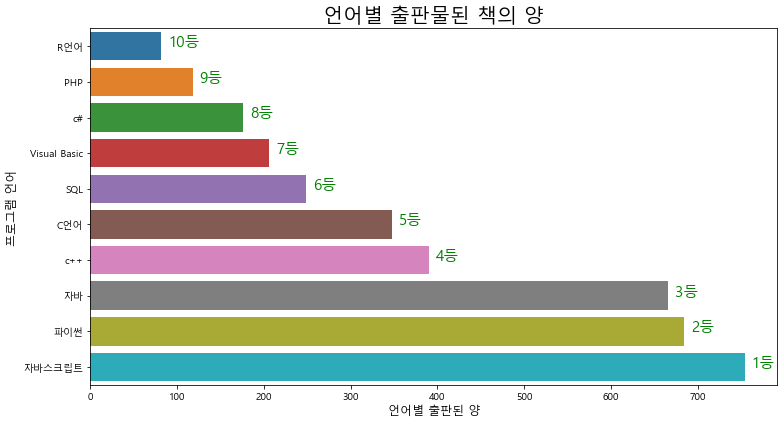

In [72]:
plt.figure(figsize=(11,6))
sns.barplot(data=langage_group_df,x="출판사",y=langage_group_df.index,order=langage_group_df.index);
plt.title("언어별 출판물된 책의 양",fontsize=20)
plt.xlabel("언어별 출판된 양",fontsize=12)
plt.ylabel("프로그램 언어",fontsize=12)

for i in range(10):
    plt.text(langage_group_df.loc[langage_group_df.index[i]].values[0] + 8, i, f'{10-i}등', fontsize=15, color='green')
    
plt.tight_layout()
plt.show()

언어별 출판된 양은 자바 스크립트가 1위이고, 그 뒤에 파이썬, 자바, C++, C언어 순으로 출판된것을 알수 있다.

---
# 문제 04
수집된 정보를 기반으로 우리나라의 컴퓨터 언어 관련 출판사 순위를 확인해 주세요.

In [73]:
publish_group_df = clean_df[["프로그램언어","출판사"]].groupby("출판사").agg("count").sort_values(by="프로그램언어")
publish_group_df

,프로그램언어
출판사,
북스홀릭,17
삼양출판사,21
삼양미디어,22
로드북,22
BOOKK(부크크),23
피씨북,23
생능출판,24
지앤선,24
루비페이퍼,25


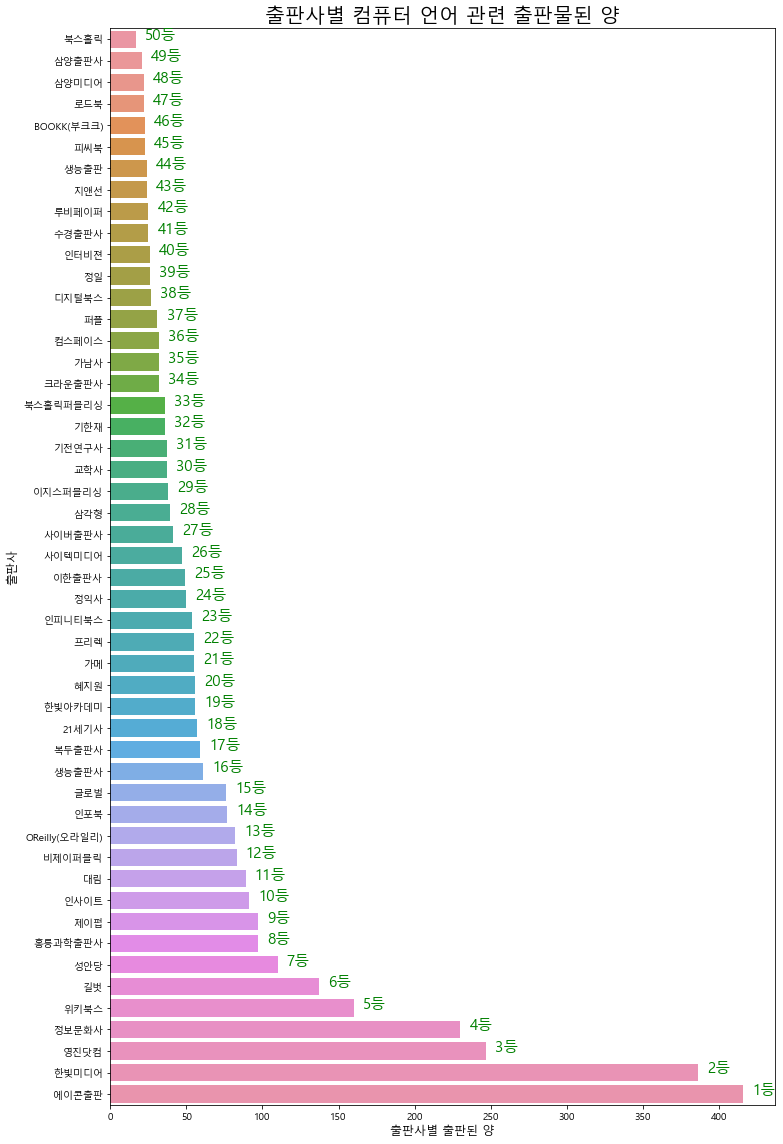

In [74]:
plt.figure(figsize=(11,16))
sns.barplot(data=publish_group_df,x="프로그램언어",y=publish_group_df.index,order=publish_group_df.index);
plt.title("출판사별 컴퓨터 언어 관련 출판물된 양",fontsize=20)
plt.xlabel("출판사별 출판된 양",fontsize=12)
plt.ylabel("출판사",fontsize=12)

for i in range(50):
    plt.text(publish_group_df.loc[publish_group_df.index[i]].values[0] + 6, i, f'{50-i}등', fontsize=15, color='green')
    
plt.tight_layout()
plt.show()

우리나라에서 컴퓨터 언어 관련 출판사 순위는 에이콘출판이 제일 많고, 다음은 한빛미디어 인것을 알수 있다.또한 해당 그래프로 특이한점으로는 우리나라에서 한빛 미디어와 에이콘 출판의 차이는 30권 차이가 나지만, 3등부터는 1등과 2등의 차이가 약 139 권 정도로 차이가 많이난다.


In [75]:
# 에이콘출판과 한빛미디어가 우리나라에서 컴퓨터 언어 관련 차지하는 비율
print("에이콘 출판과 한빛미디어가 우리나라에서 컴퓨터 언어 관련 차지하는 비율 : ",round((416 + 386) / publish_group_df["프로그램언어"].sum(),2))

에이콘 출판과 한빛미디어가 우리나라에서 컴퓨터 언어 관련 차지하는 비율 :  0.22


In [76]:
publish_group_df

,프로그램언어
출판사,
북스홀릭,17
삼양출판사,21
삼양미디어,22
로드북,22
BOOKK(부크크),23
피씨북,23
생능출판,24
지앤선,24
루비페이퍼,25


In [77]:
publish_group_df.loc[publish_group_df["프로그램언어"] >=91,"그룹"] = "컴퓨터 언어관련 Top 10인 출판사들"
publish_group_df.loc[publish_group_df["프로그램언어"] <91,"그룹"] = "컴퓨터 언어관련 Top 10이 아닌 출판사들"

In [78]:
publish_group_df1 = publish_group_df[["그룹","프로그램언어"]].groupby("그룹").agg("sum")
publish_group_df1

,프로그램언어
그룹,
컴퓨터 언어관련 Top 10이 아닌 출판사들,1702
컴퓨터 언어관련 Top 10인 출판사들,1971


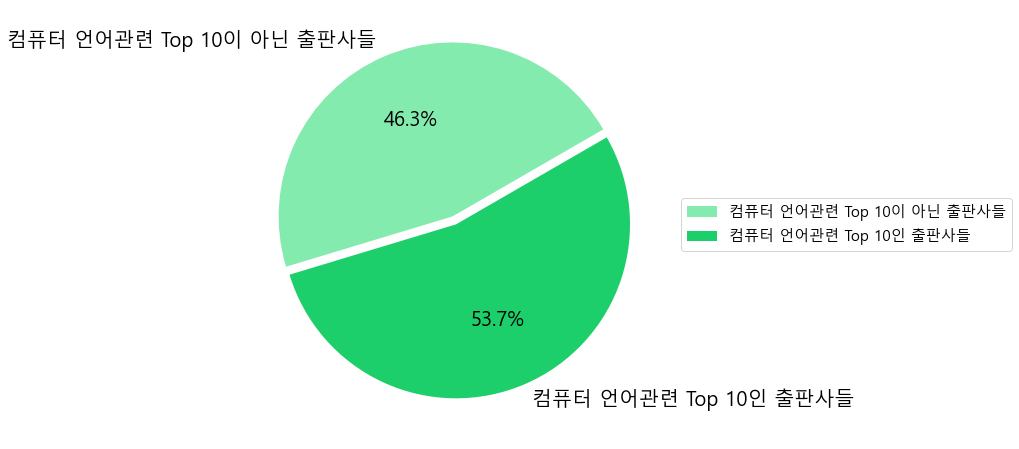

In [79]:
plt.figure(figsize=(8,8))
plt.pie(publish_group_df1["프로그램언어"] / publish_group_df1["프로그램언어"].sum(),
        autopct='%0.1f%%',
       labels=publish_group_df1.index,
         textprops={'fontsize': 20},
         explode=(0.05, 0,) ,
        startangle=30,
        colors=["#84ebaf","#1dcf6a"]
       );
plt.legend(loc = "center left",bbox_to_anchor=(1, 0.5),fontsize=15)

#### Top10 출판사들이 53.7퍼센트 정도 우리나라 컴퓨터 관련 언어 책을 출판하고 있다.

---
# 문제 05

수집된 정보에서 출판일 기준, 최근 2년간(20년, 21년) 데이터와 그 전 3년(17년, 18년, 19년) 데이터를
비교해주세요.

여기서 비교해야할 대상은 여러분들이 정하세요. 두 기간의 데이터를 관찰해서 특이한 사항들을 정리해주면
됩니다. 이 과정에서 역시 적절한 시각화도 고민해 주세요.

특히 어떤 특정 언어의 변화가 감지되면 강조해주세요.

우리가 알고자하는 데이터 정보가 년도에 대해 알고자하니, 출판일을 슬라이싱을 통해 년도 정보를 추출한다.

In [80]:
clean_df["year"]= clean_df["출판일"].str.slice(0,4)

In [81]:
clean_df["year"] = clean_df["year"].astype("int")

In [82]:
clean_20 = clean_df[(clean_df["year"]==2020) | (clean_df["year"]==2021)]

In [83]:
clean_17 = clean_df[(clean_df["year"]==2017) | (clean_df["year"]==2018) | (clean_df["year"]==2019)]

In [84]:
clean_17.shape,clean_20.shape

((684, 10), (405, 10))

* **17 ~ 19년도와 20 ~ 21년도의 언어별 출판 수**

년도 데이터는 시간의 흐름을 가진 데이터이다. 그렇기에 17~19년 데이터에서 20~21년으로 변하면서 어떤 언어의 책들이 출판되었고 변화가 생겼는지 비교해보고자 한다.

In [85]:
clean_17.head(2)

,책제목,isbn,출판사,작가,출판일,가격,할인된기격,링크,프로그램언어,year
1,C 언어 for Beginner (쉽게 배워 제대로 만드는 C 프로그램),1156643953 9791156643951,한빛아카데미,우재남,20180630,23000.0,22500.0,http://book.naver.com/bookdb/book_detail.php?b...,C언어,2018
2,알고리즘과 파이썬,893530543X 9788935305438,정익사,채진석,20190826,27000.0,27000.0,http://book.naver.com/bookdb/book_detail.php?b...,파이썬,2019


In [86]:
langage_group_df17 = clean_17[["프로그램언어","출판사"]].groupby("프로그램언어").agg("count").sort_values(by="출판사")
langage_group_df17

,출판사
프로그램언어,
Visual Basic,3
PHP,11
SQL,21
c#,21
R언어,32
c++,44
C언어,51
자바,71
자바스크립트,135


In [87]:
langage_group_df20 = clean_20[["프로그램언어","출판사"]].groupby("프로그램언어").agg("count").sort_values(by="출판사")
langage_group_df20

,출판사
프로그램언어,
Visual Basic,2
PHP,4
c#,10
c++,11
SQL,14
R언어,20
자바,23
C언어,33
자바스크립트,52


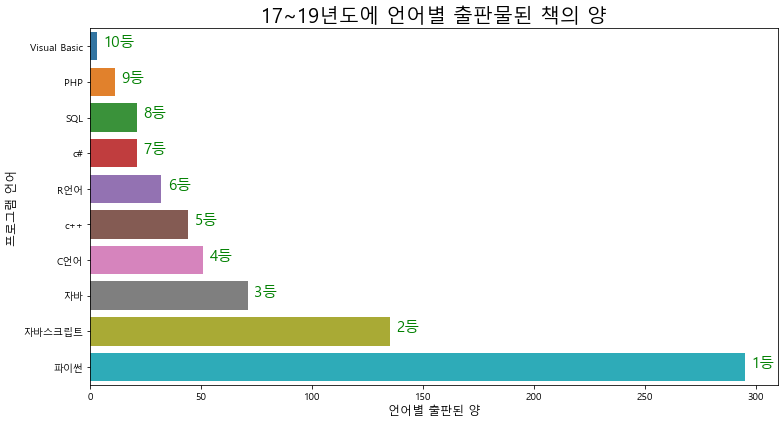

In [88]:
plt.figure(figsize=(11,6))
sns.barplot(data=langage_group_df17,x="출판사",y=langage_group_df17.index,order=langage_group_df17.index);
plt.title("17~19년도에 언어별 출판물된 책의 양",fontsize=20)
plt.xlabel("언어별 출판된 양",fontsize=12)
plt.ylabel("프로그램 언어",fontsize=12)

for i in range(10):
    plt.text(langage_group_df17.loc[langage_group_df17.index[i]].values[0] + 3, i, f'{10-i}등', fontsize=15, color='green')
    
plt.tight_layout()
plt.show()

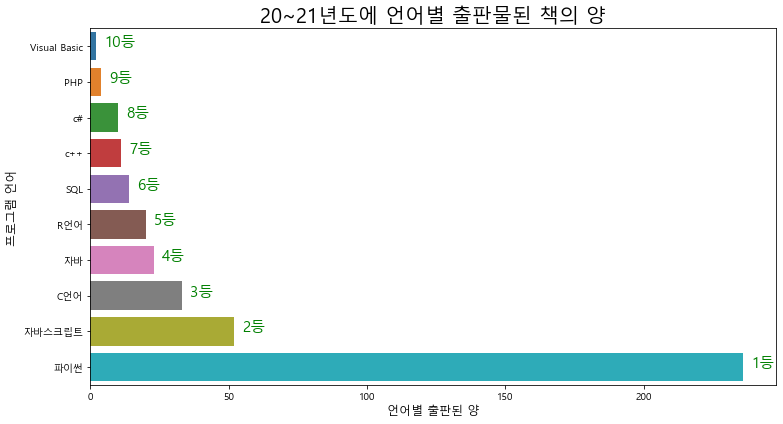

In [89]:
plt.figure(figsize=(11,6))
sns.barplot(data=langage_group_df20,x="출판사",y=langage_group_df20.index,order=langage_group_df20.index);
plt.title("20~21년도에 언어별 출판물된 책의 양",fontsize=20)
plt.xlabel("언어별 출판된 양",fontsize=12)
plt.ylabel("프로그램 언어",fontsize=12)

for i in range(10):
    plt.text(langage_group_df20.loc[langage_group_df20.index[i]].values[0] + 3, i, f'{10-i}등', fontsize=15, color='green')
    
plt.tight_layout()
plt.show()

17 ~ 19년도와 20 ~ 21년도의 두 집단에서 언어별 출판된 양은 파이썬이 제일 많고, 20 ~ 21년이 되었을때 자바 관련 책 출판양이 17~19에 비해 줄어든것으로 보여진다. 하지만 이 수치를 정확하게 비교하기 위해 전체 출하량으로 나눠서 해당 년도에 컴퓨터 언어 관련 어떤 언어를 집중해서 출판했는지 파악하도록 하자.

In [90]:
langage_group_df17["출판사"]  =  langage_group_df17["출판사"] / langage_group_df17["출판사"].sum()
langage_group_df20["출판사"]  =  langage_group_df20["출판사"] / langage_group_df20["출판사"].sum()

In [91]:
langage_group_df20["집단"] ="20~21"
langage_group_df20.columns=["출판사","집단"]

langage_group_df17["집단"] ="17~19"
langage_group_df17.columns=["출판사","집단"]

In [92]:
total_group = pd.concat([langage_group_df17,langage_group_df20],axis=0).reset_index()
total_group.head(5)

,프로그램언어,출판사,집단
0,Visual Basic,0.004386,17~19
1,PHP,0.016082,17~19
2,SQL,0.030702,17~19
3,c#,0.030702,17~19
4,R언어,0.046784,17~19


Text(0, 0.5, '프로그램 언어')

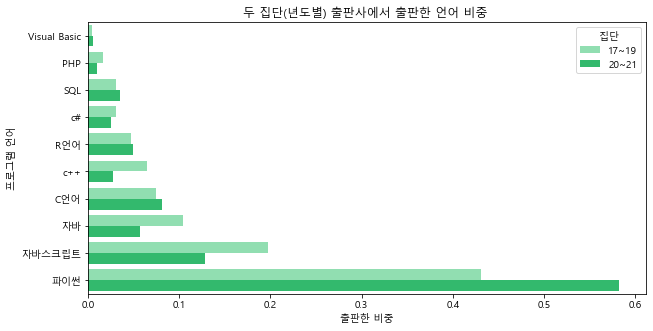

In [93]:
plt.figure(figsize=(10,5))
sns.set_palette(["#84ebaf","#1dcf6a"])
sns.barplot(data=total_group,y ="프로그램언어",x="출판사",hue="집단");
plt.title("두 집단(년도별) 출판사에서 출판한 언어 비중 ")
plt.xlabel("출판한 비중")
plt.ylabel("프로그램 언어")

확실히 20년부터 **`파이썬`** 이라는 언어 책을 출판을 많이한 것으로 보여지며, 이전 인기있던 자바 언어는 줄어든것으로 보여진다.

* 추가적으로 13(13~15)년을 비교해 17년과 20년도에 파이썬의 인기가 급증한것이 맞는지 13년도 데이터를 통해 비교해보자.

In [94]:
clean_13 = clean_df[(clean_df["year"]==2013)|(clean_df["year"]==2014) | (clean_df["year"]==2015) ]

In [95]:
langage_group_df13 = clean_13[["프로그램언어","출판사"]].groupby("프로그램언어").agg("count").sort_values(by="출판사")
langage_group_df13

,출판사
프로그램언어,
Visual Basic,3
PHP,11
R언어,11
c#,18
SQL,26
c++,39
C언어,40
파이썬,67
자바,83


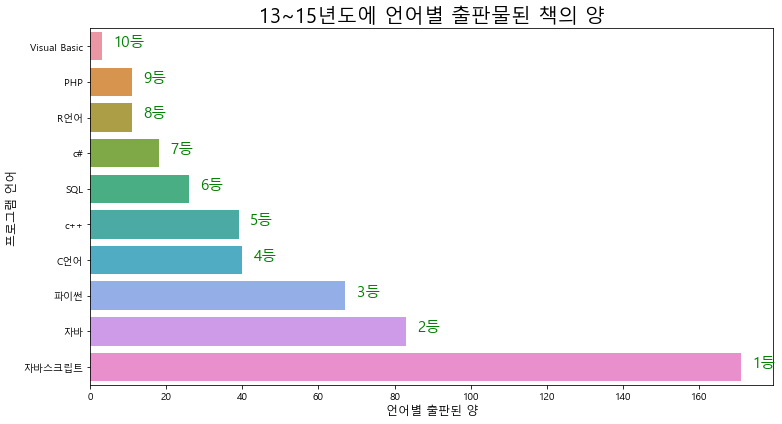

In [96]:
plt.figure(figsize=(11,6))
sns.barplot(data=langage_group_df13,x="출판사",y=langage_group_df13.index,order=langage_group_df13.index);
plt.title("13~15년도에 언어별 출판물된 책의 양",fontsize=20)
plt.xlabel("언어별 출판된 양",fontsize=12)
plt.ylabel("프로그램 언어",fontsize=12)

for i in range(10):
    plt.text(langage_group_df13.loc[langage_group_df13.index[i]].values[0] + 3, i, f'{10-i}등', fontsize=15, color='green')
    
plt.tight_layout()
plt.show()

#### 이것을 통해 `13년도에서 15년`까지 집단의 데이터에서는 **자바와 자바스크립트**가 비중이 높게 출판이 되었다. 하지만 `17년 이후`부터 **파이썬**의 인지도가 오르면서 파이썬 관련 책들이 출판되는것으로 보여졌다.